## Памятка для понимания значений и интерпретации результатов

### **1. IC₅₀ (Half Maximal Inhibitory Concentration)**  
- **Определение:** Концентрация вещества, необходимая для **подавления** биологического процесса (например, репликации вируса, активности фермента) на **50%** по сравнению с контролем.  
- **Применение:**  
  - В противовирусных исследованиях — показывает, насколько эффективно вещество блокирует вирус.  
  - Чем **меньше IC₅₀**, тем выше эффективность соединения.  

### **2. CC₅₀ (Half Maximal Cytotoxic Concentration)**  
- **Определение:** Концентрация вещества, вызывающая **гибель 50% клеток** в эксперименте (токсичность).  
- **Применение:**  
  - Отражает **цитотоксичность** вещества для здоровых клеток.  
  - Чем **выше CC₅₀**, тем безопаснее соединение.  

### **3. SI (Selectivity Index — Индекс Селективности)**  
- **Формула:**  
  $ SI = \frac{CC_{50}}{IC_{50}}   $
- **Смысл:** Показывает, насколько вещество **избирательно** действует на мишень (например, вирус), а не на клетки хозяина.  
  - **SI > 10** — считается приемлемым для потенциальных лекарств.  
  - **SI > 100** — высокая селективность, минимальная токсичность.  

### **Пример интерпретации:**  
Если у препарата:  
- **IC₅₀ = 1 μM** (хорошо подавляет вирус),  
- **CC₅₀ = 100 μM** (низкая токсичность),  
то **SI = 100** — отличный кандидат для дальнейших исследований.  

Эти параметры критически важны при скрининге новых лекарств, особенно противовирусных (например, против ВИЧ, SARS-CoV-2).

In [1]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_excel('data/Данные_для_курсовои_Классическое_МО.xlsx')
# Удаляем нумерацию что бы она нам не мешалась
df.drop(['Unnamed: 0'], inplace = True, axis = 1)
# Проверка на наличие пропущенных значений
missing_df = pd.DataFrame({
    "Количество пропусков": df.isnull().sum(),
    "Доля пропусков (%)": (df.isnull().mean() * 100).round(2)
})

missing_df = missing_df[missing_df["Количество пропусков"] > 0]

print("Статистика пропусков:")
missing_df

Статистика пропусков:


,Количество пропусков,Доля пропусков (%)
MaxPartialCharge,3,0.3
MinPartialCharge,3,0.3
MaxAbsPartialCharge,3,0.3
MinAbsPartialCharge,3,0.3
BCUT2D_MWHI,3,0.3
BCUT2D_MWLOW,3,0.3
BCUT2D_CHGHI,3,0.3
BCUT2D_CHGLO,3,0.3
BCUT2D_LOGPHI,3,0.3
BCUT2D_LOGPLOW,3,0.3


In [3]:
df.fillna(0, inplace=True)
df

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,0,0,0
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,0,0,0
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,1,0,0,0,0,0,0,0,0,0
999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,522.635,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Разделение на признаки (X) и целевые переменные (y)
X = df.drop(columns=["IC50, mM", "CC50, mM", "SI"])  # Все фичи, кроме целевых
y_cc50 = df["CC50, mM"]

# Бинарные классификации (медианные пороги)
median_cc50 = y_cc50.median()

y_cc50_class = (y_cc50 > median_cc50).astype(int)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from cuml.ensemble import RandomForestClassifier
from cuml.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV
import time

def compare_classification_models(X, y, test_size=0.2, random_state=42, n_iter=10):
    """
    Сравнивает производительность различных моделей классификации
    
    Параметры:
    -----------
    X : array-like
        Матрица признаков
    y : array-like
        Вектор целевой переменной (уже бинаризированный)
    test_size : float
        Доля тестовой выборки (по умолчанию 0.2)
    random_state : int
        Seed для воспроизводимости (по умолчанию 42)
    n_iter : int
        Количество итераций для RandomizedSearchCV
    
    Возвращает:
    -----------
    pd.DataFrame
        Таблица с результатами оценки моделей
    """
    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Удаление аномалий (только из обучающей выборки!)
    iso_forest = IsolationForest(
        contamination=0.05,
        random_state=random_state,
        n_jobs=-1
    )
    outliers_mask = iso_forest.fit_predict(X_train) == 1
    X_train = X_train[outliers_mask]
    y_train = y_train[outliers_mask]
    
    print(f"Удалено {len(outliers_mask) - sum(outliers_mask)} аномалий ({100*(1 - sum(outliers_mask)/len(outliers_mask)):.1f}% данных)")
    
    # Масштабирование данных
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Модели
    models = {
        "XGBoost": {
            "model": XGBClassifier(random_state=random_state, device="cuda"),
            "params": {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            }
        },
        "K-Neighbors (GPU)": {
            "model": KNeighborsClassifier(random_state=random_state),
            "params": {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'brute']
            }
        },
        "Random Forest": {
            "model": RandomForestClassifier(random_state=random_state),
            "params": {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'bootstrap': [True, False]
            }
        }
    }
    
    results = []
    
    # Обучение и оценка
    for name, config in models.items():
        start_time = time.time()
        
        search = RandomizedSearchCV(
            estimator=config["model"],
            param_distributions=config["params"],
            n_iter=n_iter,
            cv=3,
            scoring='roc_auc',
            random_state=random_state,
            n_jobs=-1
        )
        
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test)
        
        results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, y_proba),
            'Best Params': search.best_params_,
            'Time (sec)': round(time.time() - start_time, 2)
        })
        
        print({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, y_proba),
            'Best Params': search.best_params_,
            'Time (sec)': round(time.time() - start_time, 2)
        })
        
    results_df = pd.DataFrame(results).set_index('Model')
    
    # Визуализация на одном графике
    plt.figure(figsize=(14, 8))
    
    # Подготовка данных для графика
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
    colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet']
    titles = [
        'Accuracy (чем выше, тем лучше)',
        'Precision (чем выше, тем лучше)',
        'Recall (чем выше, тем лучше)',
        'F1 (чем выше, тем лучше)',
        'ROC AUC (чем выше, тем лучше)'
    ]
    
    # Построение группированного bar plot
    bar_width = 0.15
    index = np.arange(len(results_df))
    
    for i, metric in enumerate(metrics):
        plt.bar(index + i*bar_width, results_df[metric], bar_width, 
                color=colors[i], label=titles[i])
    
    plt.xlabel('Модели')
    plt.ylabel('Значения метрик')
    plt.title('Сравнение моделей классификации по различным метрикам', pad=20)
    plt.xticks(index + 2*bar_width, results_df.index)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.ylim(0, 1.1)
    
    # Добавление значений на столбцы
    for i, model in enumerate(results_df.index):
        for j, metric in enumerate(metrics):
            plt.text(i + j*bar_width, results_df.loc[model, metric] + 0.02,
                    f'{results_df.loc[model, metric]:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    return results_df

Удалено 40 аномалий (5.0% данных)


/home/revel/.venv/lib/python3.12/site-packages/cuml/internals/api_decorators.py:317: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return init_func(self, *args, **kwargs)


{'Model': 'XGBoost', 'Accuracy': 0.6965174129353234, 'Precision': 0.6666666666666666, 'Recall': 0.78, 'F1': 0.7188940092165899, 'ROC AUC': 0.8147029702970298, 'Best Params': {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}, 'Time (sec)': 31.1}


/home/revel/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/revel/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/home/revel/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/revel/.venv/lib/python3.12/site-p

{'Model': 'K-Neighbors (GPU)', 'Accuracy': 0.7213930348258707, 'Precision': 0.6864406779661016, 'Recall': 0.81, 'F1': 0.7431192660550459, 'ROC AUC': 0.8270297029702971, 'Best Params': {'weights': 'distance', 'n_neighbors': 7, 'algorithm': 'auto'}, 'Time (sec)': 10.26}


/home/revel/.venv/lib/python3.12/site-packages/cuml/internals/api_decorators.py:317: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return init_func(self, *args, **kwargs)
/home/revel/.venv/lib/python3.12/site-packages/cuml/internals/api_decorators.py:317: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return init_func(self, *args, **kwargs)
/home/revel/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeo

{'Model': 'Random Forest', 'Accuracy': 0.7164179104477612, 'Precision': 0.6972477064220184, 'Recall': 0.76, 'F1': 0.7272727272727273, 'ROC AUC': 0.8329702970297029, 'Best Params': {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}, 'Time (sec)': 22.05}


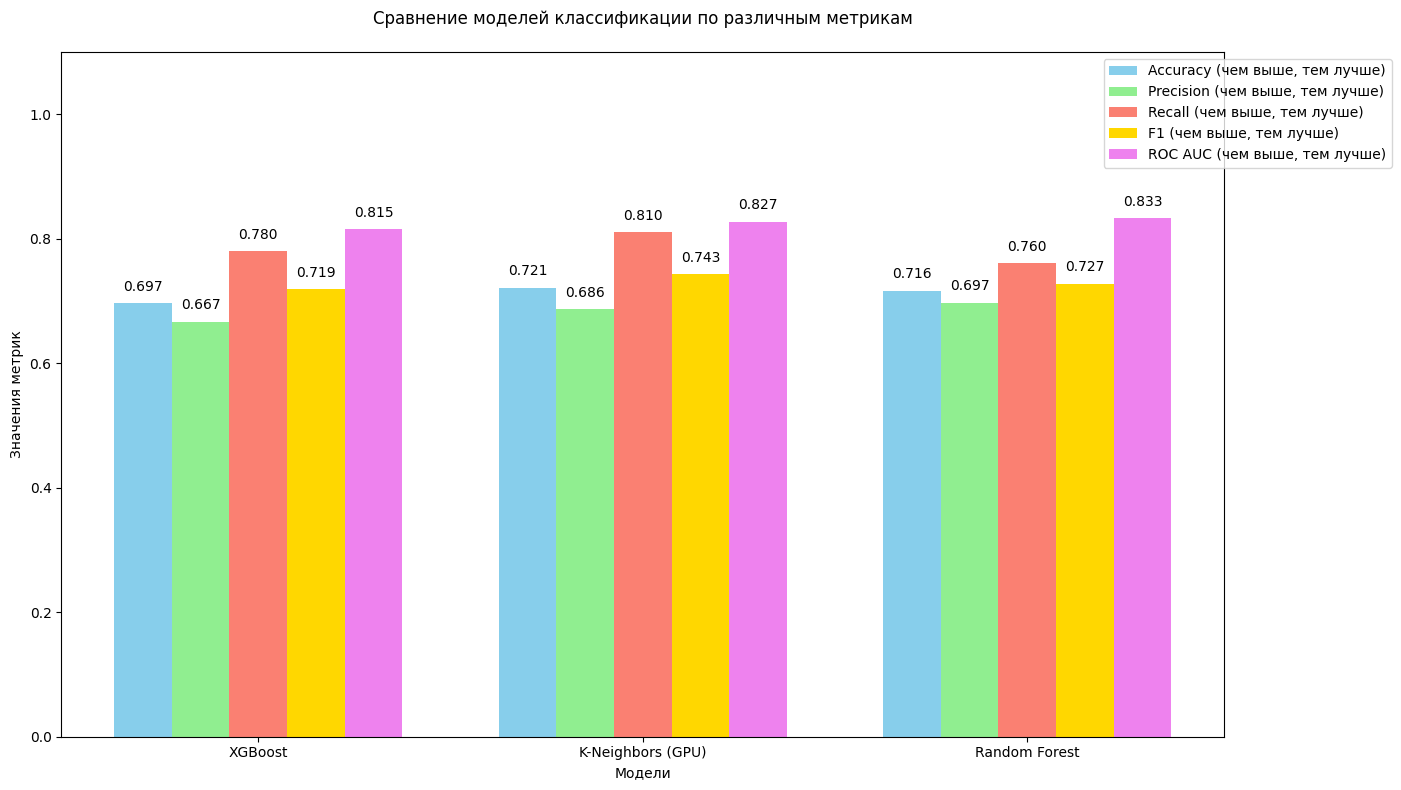

In [8]:

results = compare_classification_models(X, y_cc50_class)

Качество, ошибки и скорость

K-Neighbors показал наилучшую точность (Accuracy=0.721) и F1-меру (0.743), хотя Random Forest близок к нему по этим метрикам. При этом Random Forest демонстрирует лучшее качество по ROC-AUC (0.833), что указывает на хорошую разделяющую способность. XGBoost немного отстает по всем показателям. По скорости K-Neighbors значительно быстрее (10.26 сек) по сравнению с Random Forest (22.05 сек) и XGBoost (31.1 сек).

Гиперпараметры

Random Forest использовал 200 деревьев с глубиной 10 и минимальным размером листа 4. K-Neighbors применял 7 соседей с весовой функцией distance, что объясняет его высокий recall. XGBoost работал с ограниченной глубиной (5) и умеренным количеством estimators (100), что могло снизить его производительность.

Вывод

K-Neighbors - оптимальный выбор, сочетающий хорошую точность и высокую скорость работы. Random Forest стоит рассматривать, если критически важно качество классификации (ROC-AUC). XGBoost в текущей конфигурации уступает конкурентам